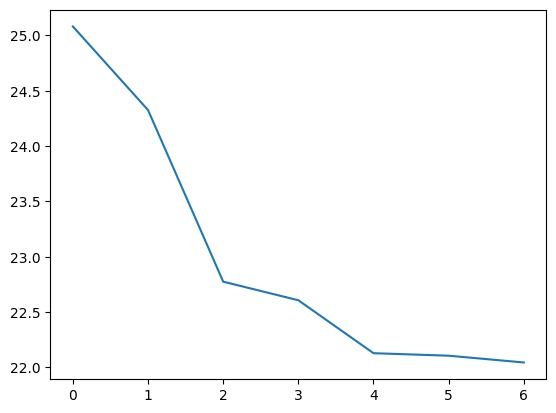

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 가우시안 함수 정의
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))

def two_gaussians(x, a1, b1, c1, a2, b2, c2):
    return (gaussian(x, a1, b1, c1) +
            gaussian(x, a2, b2, c2))

def three_gaussians(x, a1, b1, c1, a2, b2, c2, a3, b3, c3):
    return (gaussian(x, a1, b1, c1) +
            gaussian(x, a2, b2, c2) +
            gaussian(x, a3, b3, c3))

# 4개의 가우시안 피크를 합친 함수 정의
def four_gaussians(x, a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4):
    return (gaussian(x, a1, b1, c1) +
            gaussian(x, a2, b2, c2) +
            gaussian(x, a3, b3, c3) +
            gaussian(x, a4, b4, c4))

def five_gaussians(x, a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5):
    return (gaussian(x, a1, b1, c1) +
            gaussian(x, a2, b2, c2) +
            gaussian(x, a3, b3, c3) +
            gaussian(x, a4, b4, c4) + 
            gaussian(x, a5, b5, c5))

def six_gaussians(x, a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5, a6, b6, c6):
    return (gaussian(x, a1, b1, c1) +
            gaussian(x, a2, b2, c2) +
            gaussian(x, a3, b3, c3) +
            gaussian(x, a4, b4, c4) + 
            gaussian(x, a5, b5, c5) +
            gaussian(x, a6, b6, c6)
           )
    

def seven_gaussians(x, a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5, a6, b6, c6, a7, b7, c7):
    return (gaussian(x, a1, b1, c1) +
            gaussian(x, a2, b2, c2) +
            gaussian(x, a3, b3, c3) +
            gaussian(x, a4, b4, c4) + 
            gaussian(x, a5, b5, c5) +
            gaussian(x, a6, b6, c6) +
            gaussian(x, a7, b7, c7)
           )


# 엑셀 파일에서 데이터 읽기
file_path = r"D:\Users\doyeob\Desktop\gaussian fitting\input data\1313th data.xlsx"
df = pd.read_excel(file_path)

# A열의 x 값과 B열의 f(x) 값 추출
x_data = df.iloc[:, 0].values
y_data = df.iloc[:, 1].values

# NaN 및 무한대 값 제거
mask = ~np.isnan(x_data) & ~np.isnan(y_data) & ~np.isinf(x_data) & ~np.isinf(y_data)
x_data = x_data[mask]
y_data = y_data[mask]

# 초기 피크 추정치 설정
initial_guesses1 = [
    max(y_data) * 0.5, 2.0, 0.1  # 두 번째 피크 
]

initial_guesses2 = [
    max(y_data) * 0.5, 1.0, 0.1,  # 첫 번째 피크 
    max(y_data) * 0.5, 2.0, 0.1  # 두 번째 피크 
]

initial_guesses3 = [
    max(y_data) * 0.5, 1.0, 0.1,  # 첫 번째 피크 
    max(y_data) * 0.5, 2.0, 0.1,  # 두 번째 피크 
    max(y_data) * 0.5, 4.0, 0.1   # 네 번째 피크 
]

initial_guesses4 = [
    max(y_data) * 0.5, 1.0, 0.1,  # 첫 번째 피크 
    max(y_data) * 0.5, 2.0, 0.1,  # 두 번째 피크 
    max(y_data) * 0.5, 3.0, 0.1,  # 세 번째 피크 
    max(y_data) * 0.5, 4.0, 0.1   # 네 번째 피크 
]

initial_guesses5 = [
    max(y_data) * 0.5, 1.0, 0.1,  # 첫 번째 피크 
    max(y_data) * 0.5, 1.5, 0.1 ,  # 네 번째 피크  
    max(y_data) * 0.5, 2.0, 0.1,  # 두 번째 피크 
    max(y_data) * 0.5, 3.0, 0.1,  # 세 번째 피크 
    max(y_data) * 0.5, 4.0, 0.1   # 네 번째 피크 
]

initial_guesses6 = [
    max(y_data) * 0.5, 1.0, 0.1,  # 1 번째 피크 
    max(y_data) * 0.5, 1.5, 0.1,  # 2 번째 피크  
    max(y_data) * 0.5, 2.0, 0.1,  # 3 번째 피크 
    max(y_data) * 0.5, 3.0, 0.1,  # 4 번째 피크 
    max(y_data) * 0.5, 3.5, 0.1,  # 5 번째 피크 
    max(y_data) * 0.5, 4.0, 0.1  # 6 번째 피크   
]


initial_guesses7 = [
    max(y_data) * 0.5, 1.0, 0.1,  # 1 번째 피크 
    max(y_data) * 0.5, 1.5, 0.1,  # 2 번째 피크  
    max(y_data) * 0.5, 2.0, 0.1,  # 3 번째 피크 
    max(y_data) * 0.5, 3.0, 0.1,  # 4 번째 피크 
    max(y_data) * 0.5, 4.0, 0.1,  # 5 번째 피크 
    max(y_data) * 0.5, 3.5, 0.1,  # 6 번째 피크  
    max(y_data) * 0.5, 2.5, 0.1   # 7 번째 피크 
]


# 최적화 함수로 데이터 피팅
params1, _ = curve_fit(gaussian, x_data, y_data, p0=initial_guesses1, maxfev = 100000)
params2, _ = curve_fit(two_gaussians, x_data, y_data, p0=initial_guesses2, maxfev = 100000)
params3, _ = curve_fit(three_gaussians, x_data, y_data, p0=initial_guesses3, maxfev = 100000)
params4, _ = curve_fit(four_gaussians, x_data, y_data, p0=initial_guesses4, maxfev = 100000)
params5, _ = curve_fit(five_gaussians, x_data, y_data, p0=initial_guesses5, maxfev = 100000)
params6, _ = curve_fit(six_gaussians, x_data, y_data, p0=initial_guesses6, maxfev = 100000)
params7, _ = curve_fit(seven_gaussians, x_data, y_data, p0=initial_guesses7, maxfev = 100000)

loss = np.zeros((7, 1))
loss[0] = np.mean((gaussian(x_data, *params1) - y_data)**2)
loss[1] = np.mean((two_gaussians(x_data, *params2) - y_data)**2)
loss[2] = np.mean((three_gaussians(x_data, *params3) - y_data)**2)
loss[3] = np.mean((four_gaussians(x_data, *params4) - y_data)**2)
loss[4] = np.mean((five_gaussians(x_data, *params5) - y_data)**2)
loss[5] = np.mean((six_gaussians(x_data, *params6) - y_data)**2)
loss[6] = np.mean((seven_gaussians(x_data, *params7) - y_data)**2)


plt.plot(np.log(loss))
# # 피팅된 파라미터
# a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4 = params

# # 각 피크 개별 가우시안 계산
# peak1 = gaussian(x_data, a1, b1, c1)
# peak2 = gaussian(x_data, a2, b2, c2)
# peak3 = gaussian(x_data, a3, b3, c3)
# peak4 = gaussian(x_data, a4, b4, c4)

# # 전체 피팅 결과
# fitted_y_data = four_gaussians(x_data, *params)

# # 결과 시각화
# plt.plot(x_data, y_data, label='Original Data')
# plt.plot(x_data, fitted_y_data, label='Fitted Data', linestyle='--')
# plt.plot(x_data, peak1, label='Peak 1')
# plt.plot(x_data, peak2, label='Peak 2')
# plt.plot(x_data, peak3, label='Peak 3')
# plt.plot(x_data, peak4, label='Peak 4')
# plt.legend()
# plt.xlabel('x')
# plt.ylabel('f(x)')
# plt.title('Gaussian Peaks Fitting')
# plt.show()

# # 피팅된 파라미터 출력
# print('Fitted Parameters:')
# print(params)

# # 데이터를 엑셀 파일로 저장
# output_file_path = r"D:\Users\doyeob\Desktop\gaussian fitting\output data\1313th fitted_peaks(4peaks).xlsx"
# with pd.ExcelWriter(output_file_path) as writer:
#     pd.DataFrame({'x': x_data, 'Original Data': y_data}).to_excel(writer, sheet_name='Original Data', index=False)
#     pd.DataFrame({'x': x_data, 'Fitted Data': fitted_y_data}).to_excel(writer, sheet_name='Fitted Data', index=False)
#     pd.DataFrame({'x': x_data, 'Peak 1': peak1}).to_excel(writer, sheet_name='Peak 1', index=False)
#     pd.DataFrame({'x': x_data, 'Peak 2': peak2}).to_excel(writer, sheet_name='Peak 2', index=False)
#     pd.DataFrame({'x': x_data, 'Peak 3': peak3}).to_excel(writer, sheet_name='Peak 3', index=False)
#     pd.DataFrame({'x': x_data, 'Peak 4': peak4}).to_excel(writer, sheet_name='Peak 4', index=False)

# print('Fitting 및 저장 완료.')
